In [51]:
import os, sys, torch
sys.path.append(os.path.abspath('../modules/mnist'))
sys.path.append(os.path.abspath('../modules'))
import vae
import vae_viz as viz
import utility as ut
from torchsummary import summary
import lora
import classifier as cl


folder = '../data/MNIST/vae'
epochs = 100
batch_size = 100
latent_dim = 2
device = torch.device("cuda" if torch.cuda.is_available() else "mps")

categorizer = cl.get_classifier(device=device) 

lora_r = 39
net_path_0 = '../data/MNIST/vaeu/checkpoints/vae_500.pth'
orthogonality_factor = 10.

model = vae.VAE(device=device)
model.load_state_dict(torch.load(net_path_0))
model.to(device)
#


expr_folder = f'../data/MNIST/vaeu-l-r{lora_r}-su'
net_path_1 = f'../data/MNIST/vaeu-l-r{lora_r}-su/checkpoints/vae_50.pth'
lora_model = vae.LoRA_VAE(ut.freeze_all(model), lora_r=lora_r).to(device)
lora_model.load_state_dict(torch.load(net_path_1))

# lora_r1 = 39
# expr_folder = f'../data/MNIST/vaeu-ou-all-l-r{lora_r1}-su'
# net_path_1 = f'../data/MNIST/vaeu-ou-all-l-r{lora_r1}-su/checkpoints/vae_100.pth'
# lora_model_1 = vae.LoRA_VAE(ut.freeze_all(model), lora_r=lora_r).to(device)
# lora_model_1.load_state_dict(torch.load(net_path_1))
                             
# viz.visualize(lora_model, expr_folder, num_samples_animation=169, fps=1, total_frames=200)


# expr_folder = f'../data/MNIST/vaeu'
# viz.visualize(model, expr_folder, num_samples_animation=169, fps=12, total_frames=200)

<All keys matched successfully>

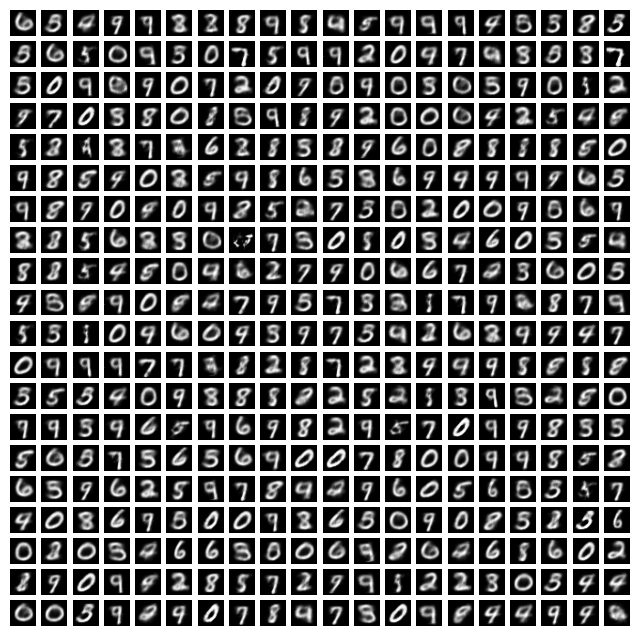

In [52]:
imgs = viz.generate_random_samples(lora_model, num_samples=400)

In [9]:
print(torch.argmax(torch.softmax(categorizer(imgs), dim=1), dim=1))

tensor([5, 4, 2, 0, 5, 5, 5, 8, 6, 4, 7, 0, 0, 8, 2, 7, 6, 2, 0, 4, 9, 8, 9, 2,
        3], device='mps:0')


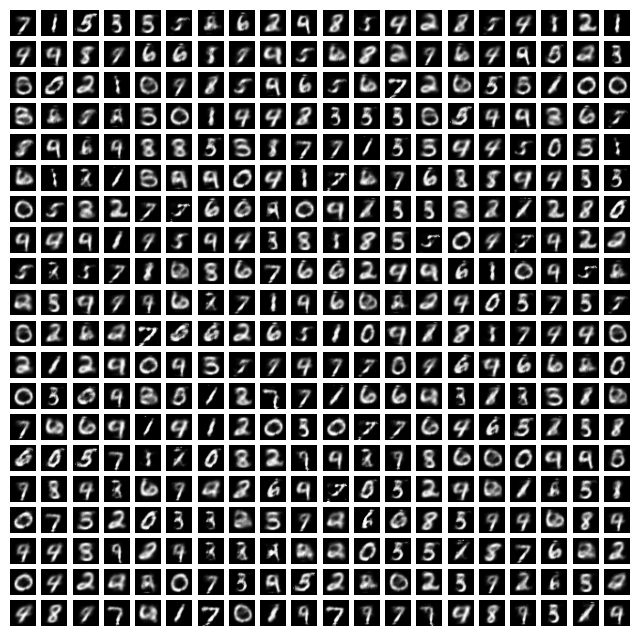

In [13]:
imgs = viz.generate_random_samples(model, num_samples=400)

In [15]:
print(torch.bincount(torch.argmax(torch.softmax(categorizer(imgs), dim=1), dim=1))/400)

tensor([0.1100, 0.0850, 0.1100, 0.0825, 0.1550, 0.0800, 0.1175, 0.1225, 0.1000,
        0.0375], device='mps:0')


In [42]:
.95*.9

0.855